In [1]:
# Installing Libraries

!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install openpyxl
!pip install datetime

     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     ------ ------------------------------ 30.7/162.8 kB 660.6 kB/s eta 0:00:01
     ----------------------------------- -- 153.6/162.8 kB 1.8 MB/s eta 0:00:01
     -------------------------------------- 162.8/162.8 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.7 MB 8.6 MB/s eta 0:00:01
   --- ------------------------------------ 0.6/7.7 MB 8.0 MB/s eta 0:00:01
   ----- ---------------------------------- 1.0/7.7 MB 7.6 MB/s eta 0:00:01
   ------ --------------------------------- 1.3/7.7 MB 7.6 MB/s eta 0:00:01
   -------- ------------------------------- 1.7/7.7 MB 7.7 MB/s eta 0:00:01
   ---------- ----------------------------- 2.1/7.7 MB 7.7 MB/s eta 0:00:01
   ------------ --------------------------- 2.4/7.7 MB 7.7 MB/s eta 0:00:01
   -------------- ------------------------- 2.8/7.7 MB 7.7 MB/s eta 0:00:01
   -------

In [2]:
# Necessary Libraries

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


# Data Importing

In [4]:
excel_path = '/Users/harishprabhu/Desktop/JAR ASSIGNEMNT/Walmart Sales.xlsx'
df = pd.read_excel(excel_path)
df.head()

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2847434726.py, line 1)

# Data Exploration

* Questions to be Answered:

    1. Analyze the performance of sales and revenue at the city and branch level.
    2. What is the average price of an item sold at each branch of the city.
    3. Analyze the performance of sales and revenue, Month over Month across the Product line, Gender, and Payment Method, and identify the focus areas to get better sales for April 2019.

In [ ]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Date', 'Time', 'Payment',
       'Rating'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Date           1000 non-null   object 
 9   Time           1000 non-null   object 
 10  Payment        1000 non-null   object 
 11  Rating         1000 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 93.9+ KB


## Insights::
    * No Null values present

### Analyzing the performance of sales and revenue at the city and branch level.

In [ ]:
# Adding a new Column TOTAL REVENUE
df['Total_Revenue'] = df['Unit price'] * df['Quantity']
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,Total_Revenue
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1,522.83
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4,324.31
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4,465.76
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3,604.17


In [ ]:
# group data by city, branch
city_branch_sales = df.groupby(["City", "Branch"]).agg({"Total_Revenue": 'sum', "Invoice ID": 'count'}).reset_index()
city_branch_sales.columns = ['City', 'Branch', 'Total Revenue', 'Total Sales']
city_branch_sales

,City,Branch,Total Revenue,Total Sales
0,Mandalay,A,34130.09,119
1,Mandalay,B,37215.93,118
2,Mandalay,C,29794.62,95
3,Naypyitaw,A,35985.64,110
4,Naypyitaw,B,35157.75,109
5,Naypyitaw,C,34160.14,109
6,Yangon,A,33647.27,114
7,Yangon,B,35193.51,113
8,Yangon,C,32302.43,113


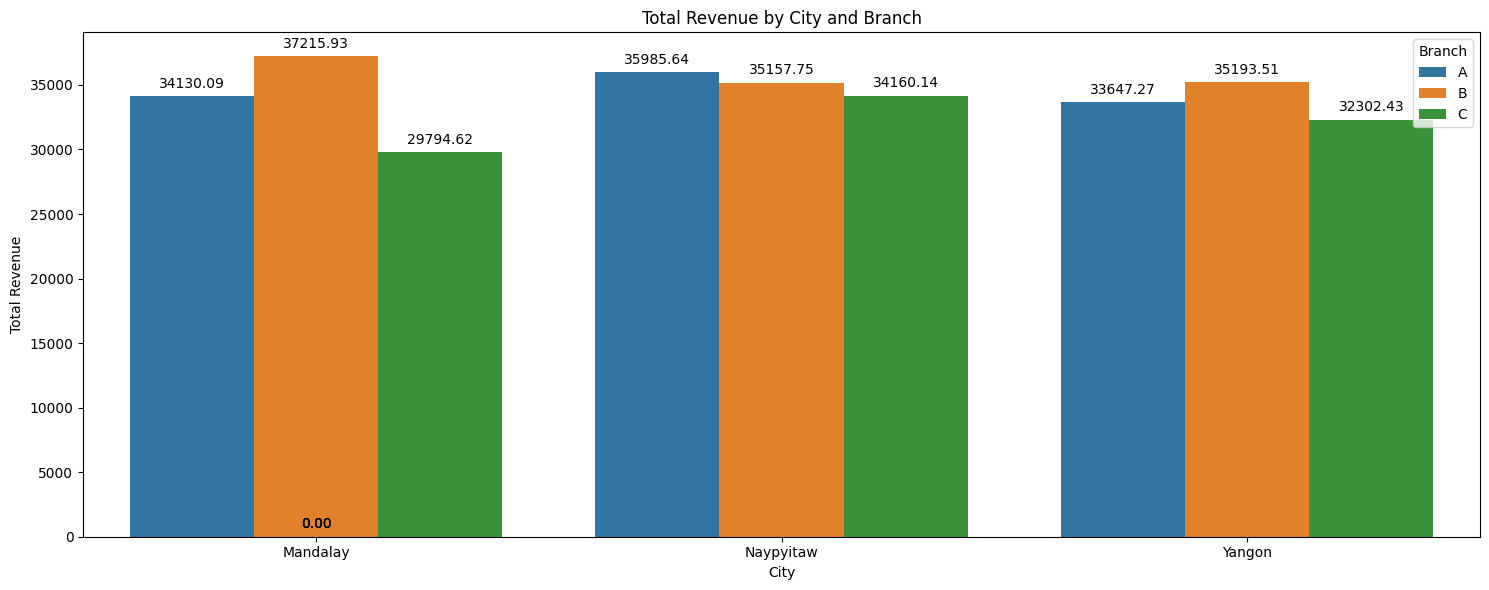

In [ ]:
# Create a Seaborn barplot to visualize total revenue for each city-branch combination

plt.figure(figsize = (15, 6))
ax = sns.barplot(data = city_branch_sales, x = 'City', y = 'Total Revenue', hue = 'Branch')
plt.title('Total Revenue by City and Branch')
plt.xlabel('City')
plt.ylabel('Total Revenue')

# Add annotations for each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.tight_layout()
plt.show()


## Insights:
    - 

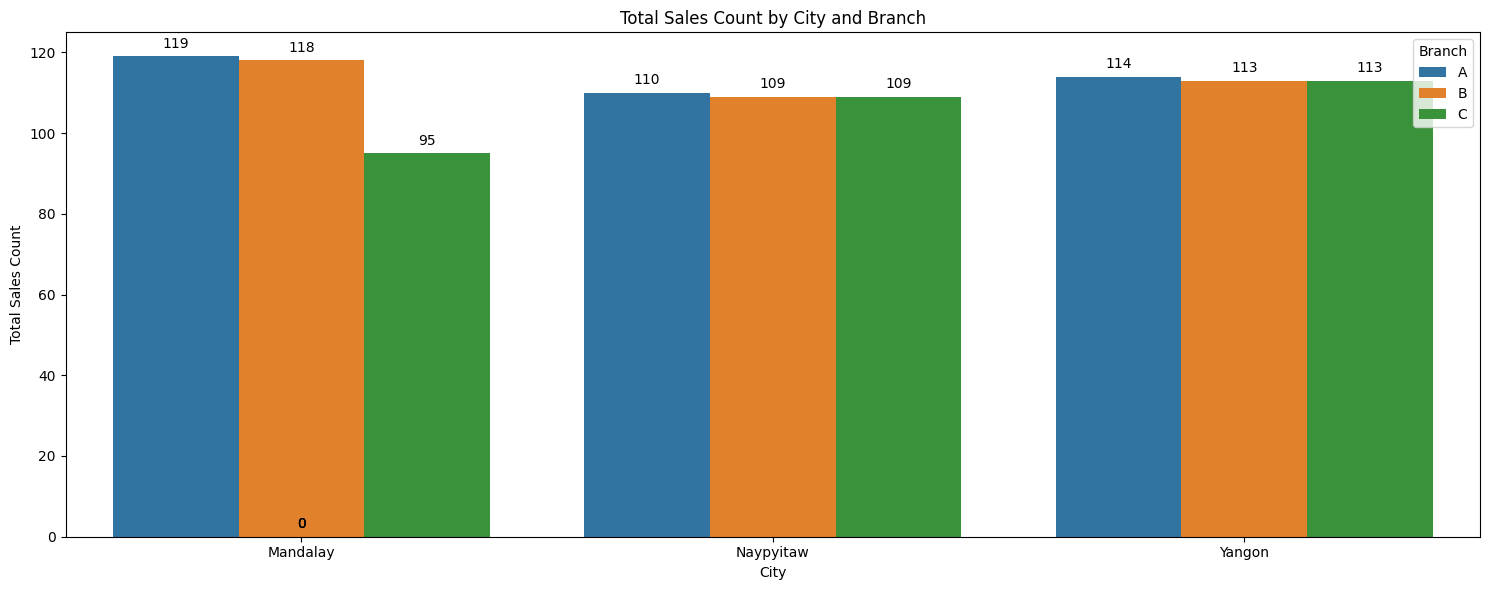

In [ ]:
# Create a Seaborn barplot to visualize total sales count for each city-branch combination
plt.figure(figsize = (15, 6))
ax = sns.barplot(data = city_branch_sales, x = 'City', y = 'Total Sales', hue = 'Branch')
plt.title('Total Sales Count by City and Branch')
plt.xlabel('City')
plt.ylabel('Total Sales Count')

# Add annotations for each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.tight_layout()
plt.show()

## Insights:

### Calculting Average price of an item sold at each branch of the city

In [ ]:
average_price_per_branch = df.groupby(['City', "Branch"])['Unit price'].mean().reset_index()
average_price_per_branch.columns = ['City', "Branch", "Average_Price"]
average_price_per_branch

,City,Branch,Average_Price
0,Mandalay,A,53.353866
1,Mandalay,B,56.133305
2,Mandalay,C,57.958316
3,Naypyitaw,A,54.123182
4,Naypyitaw,B,57.785688
5,Naypyitaw,C,57.941009
6,Yangon,A,55.639298
7,Yangon,B,56.011062
8,Yangon,C,52.684602


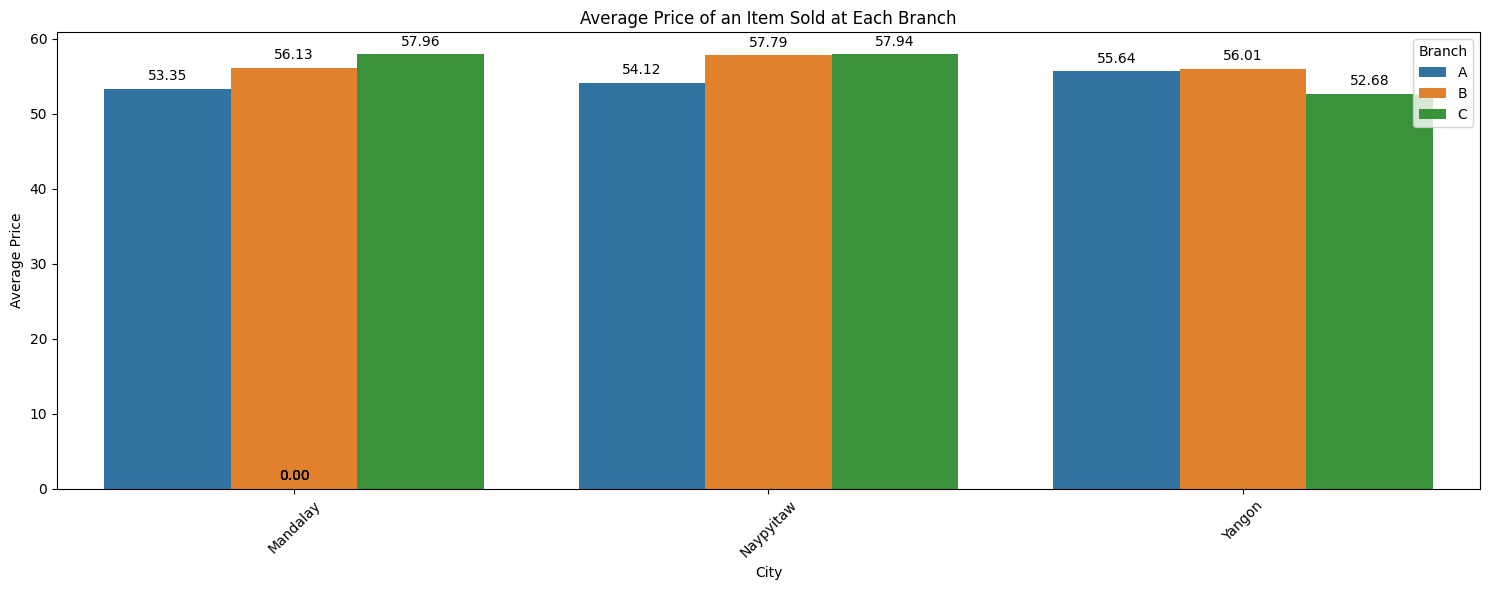

In [ ]:
# Plotting Average Price of an item sold at each branch of the city

plt.figure(figsize = (15, 6))
ax = sns.barplot(data = average_price_per_branch, x='City', y = 'Average_Price', hue = 'Branch')
plt.title('Average Price of an Item Sold at Each Branch')
plt.xlabel('City')
plt.ylabel('Average Price')

# Add annotations for each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.tight_layout()
plt.show()

## Insights:

### Analyzing the performance of sales and revenue, Month over Month across the Product line, Gender, and Payment Method, and identify the focus areas to get better sales for April 2019.

## Sales and Revenue Across Product Line

In [ ]:
# Creating new column with months
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,Total_Revenue,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,2019-01-05,13:08:00,Ewallet,9.1,522.83,1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,2019-03-08,10:29:00,Cash,9.6,76.40,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,2019-03-03,13:23:00,Credit card,7.4,324.31,3
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,2019-01-27,20:33:00,Ewallet,8.4,465.76,1
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2019-02-08,10:37:00,Ewallet,5.3,604.17,2


In [ ]:
# grouping Product line, Gender, and Payment Method
monthly_performance = df.groupby(["Month", 'Product line', 'Gender', 'Payment']).agg({"Invoice ID" : "count", "Total_Revenue" : "sum"}).reset_index()
monthly_performance.columns = 'Month', "Product_Line", "Gender", "Payment", 'Total_Sales', "Total_Revenue"
monthly_performance

,Month,Product_Line,Gender,Payment,Total_Sales,Total_Revenue
0,1,Electronic accessories,Female,Cash,9,2731.86
1,1,Electronic accessories,Female,Credit card,7,3045.42
2,1,Electronic accessories,Female,Ewallet,7,1576.48
3,1,Electronic accessories,Male,Cash,10,3380.29
4,1,Electronic accessories,Male,Credit card,8,2248.65
...,...,...,...,...,...,...
103,3,Sports and travel,Female,Credit card,9,2863.86
104,3,Sports and travel,Female,Ewallet,8,3398.57
105,3,Sports and travel,Male,Cash,8,2084.19
106,3,Sports and travel,Male,Credit card,8,3633.90


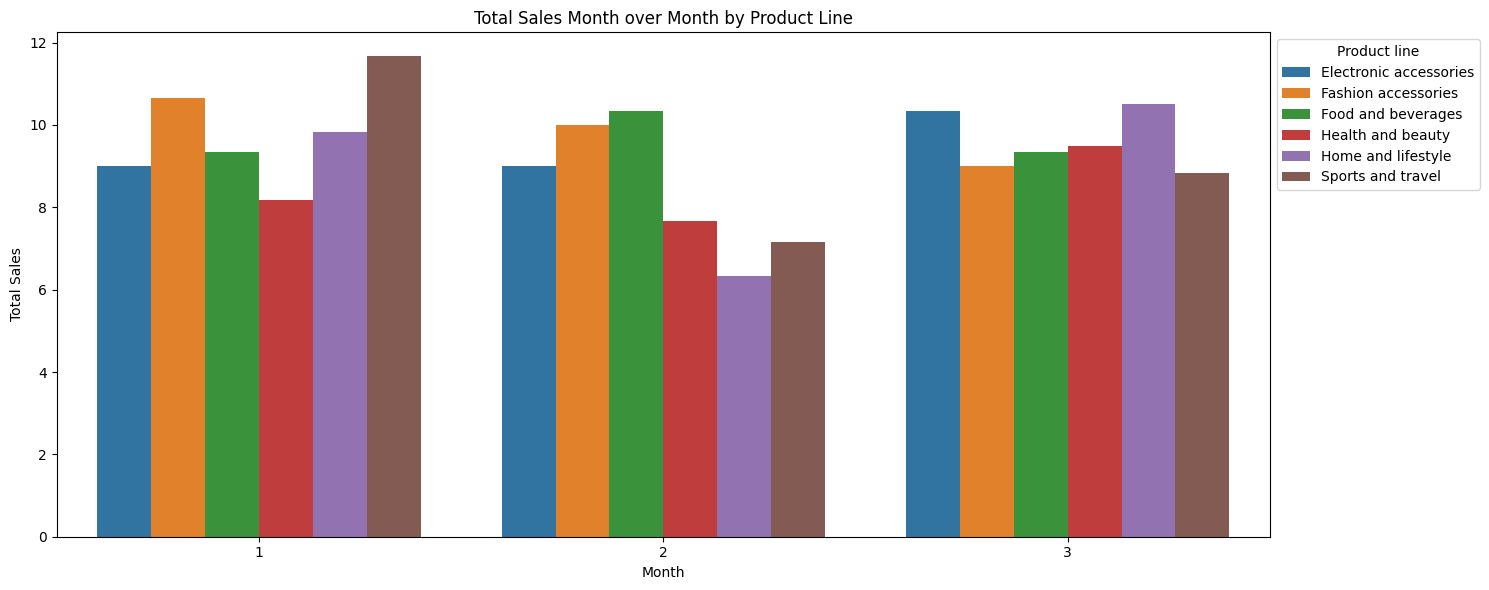

In [ ]:
# Bar Plot for Total Sales across Product Line
plt.figure(figsize = (15, 6))
sns.barplot(data = monthly_performance, x = 'Month', y = 'Total_Sales', hue = 'Product_Line', errorbar = None)
plt.title('Total Sales Month over Month by Product Line')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title = 'Product line', loc = 'upper left', bbox_to_anchor = (1.0, 1))

# Add annotations for each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.tight_layout()
plt.show()


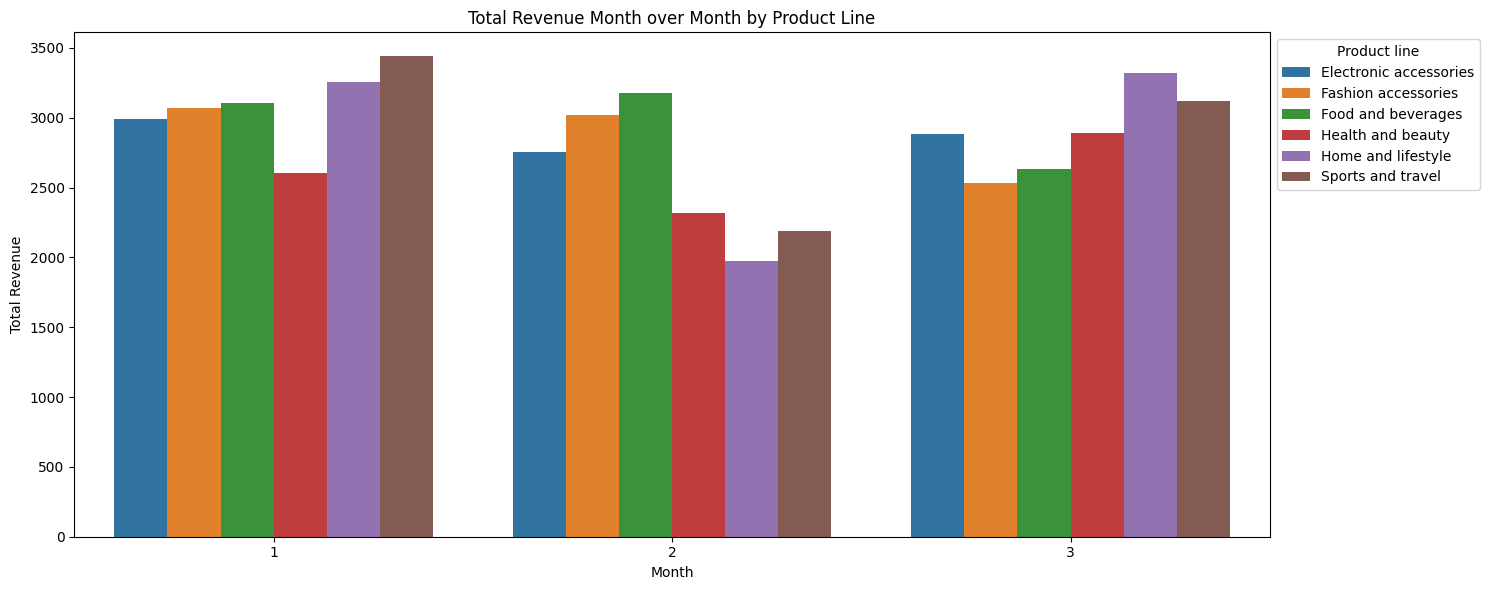

In [ ]:
# Bar Plot for Total Revenue across Product Line
plt.figure(figsize = (15, 6))
sns.barplot(data = monthly_performance, x = 'Month', y = 'Total_Revenue', hue = 'Product_Line', errorbar = None)
plt.title('Total Revenue Month over Month by Product Line')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.legend(title = 'Product line', bbox_to_anchor = (1.0, 1), loc = 'upper left')

plt.tight_layout()
plt.show()

## Sales and Revenue Across Gender

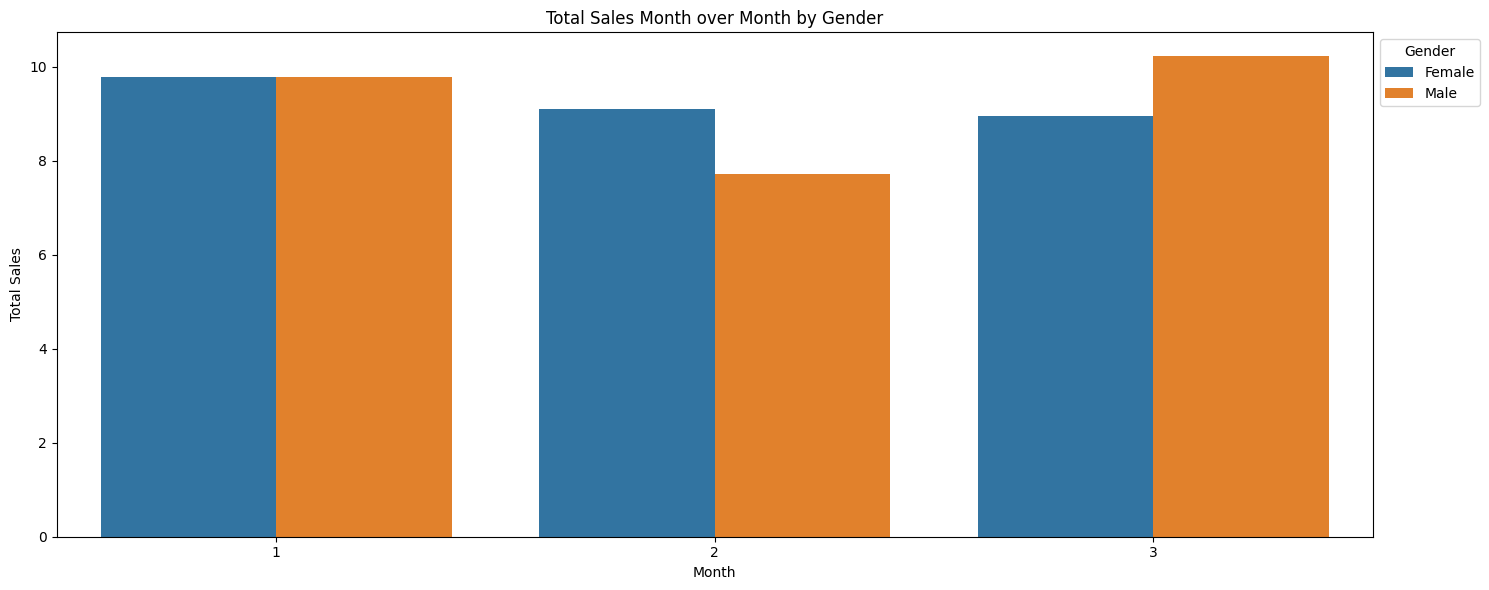

In [ ]:
# Bar Plot for Total Sales across Gender

plt.figure(figsize = (15, 6))
sns.barplot(data = monthly_performance, x = 'Month', y = 'Total_Sales', hue = 'Gender', errorbar = None)
plt.title('Total Sales Month over Month by Gender')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Gender', bbox_to_anchor=(1.0, 1), loc='upper left')

plt.tight_layout()
plt.show()


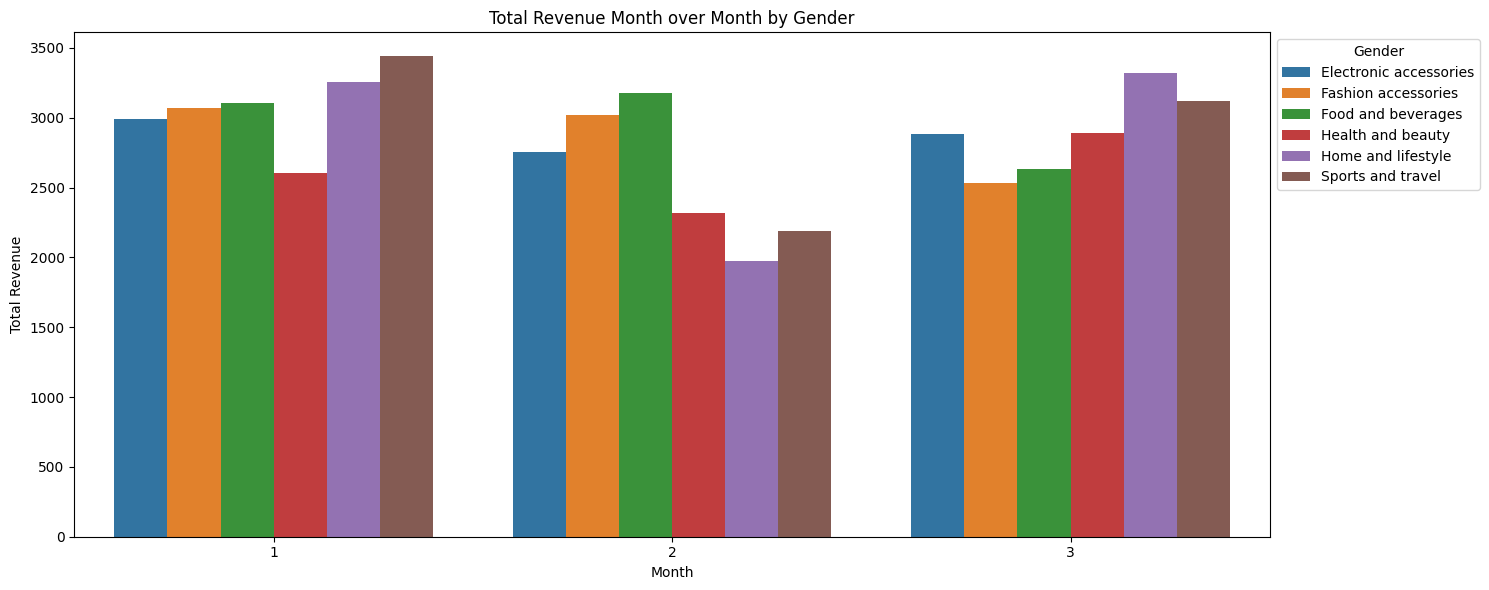

In [ ]:
# Bar Plot for Total Revenue Across Gender

plt.figure(figsize = (15, 6))
sns.barplot(data = monthly_performance, x = 'Month', y = 'Total_Revenue', hue = 'Gender', errorbar = None)
plt.title('Total Revenue Month over Month by Gender')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.legend(title='Gender', bbox_to_anchor=(1.0, 1), loc='upper left')

plt.tight_layout()
plt.show()

## Insights:

## Sales and Revenue Across Payment Methods

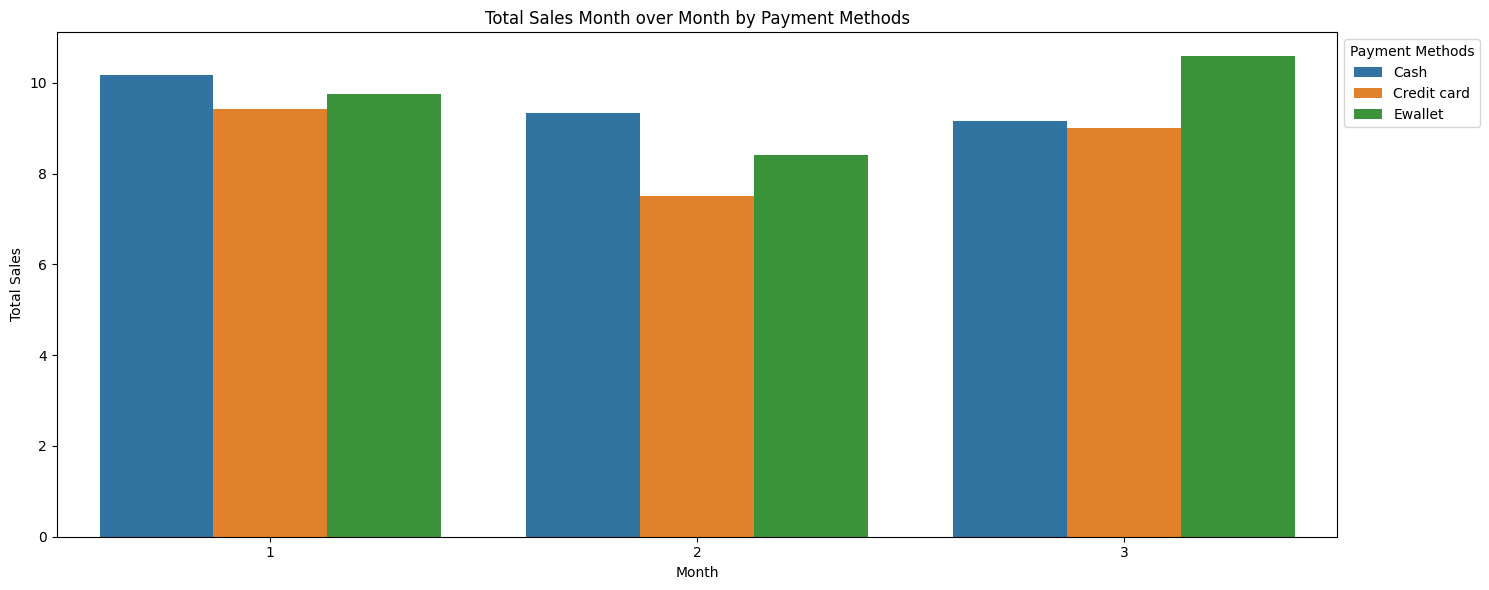

In [ ]:
# Bar Plot for Total Sales across Payment Methods

plt.figure(figsize = (15, 6))
sns.barplot(data = monthly_performance, x = 'Month', y = 'Total_Sales', hue = 'Payment', errorbar = None)
plt.title('Total Sales Month over Month by Payment Methods')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Payment Methods', bbox_to_anchor=(1.0, 1), loc='upper left')

plt.tight_layout()
plt.show()


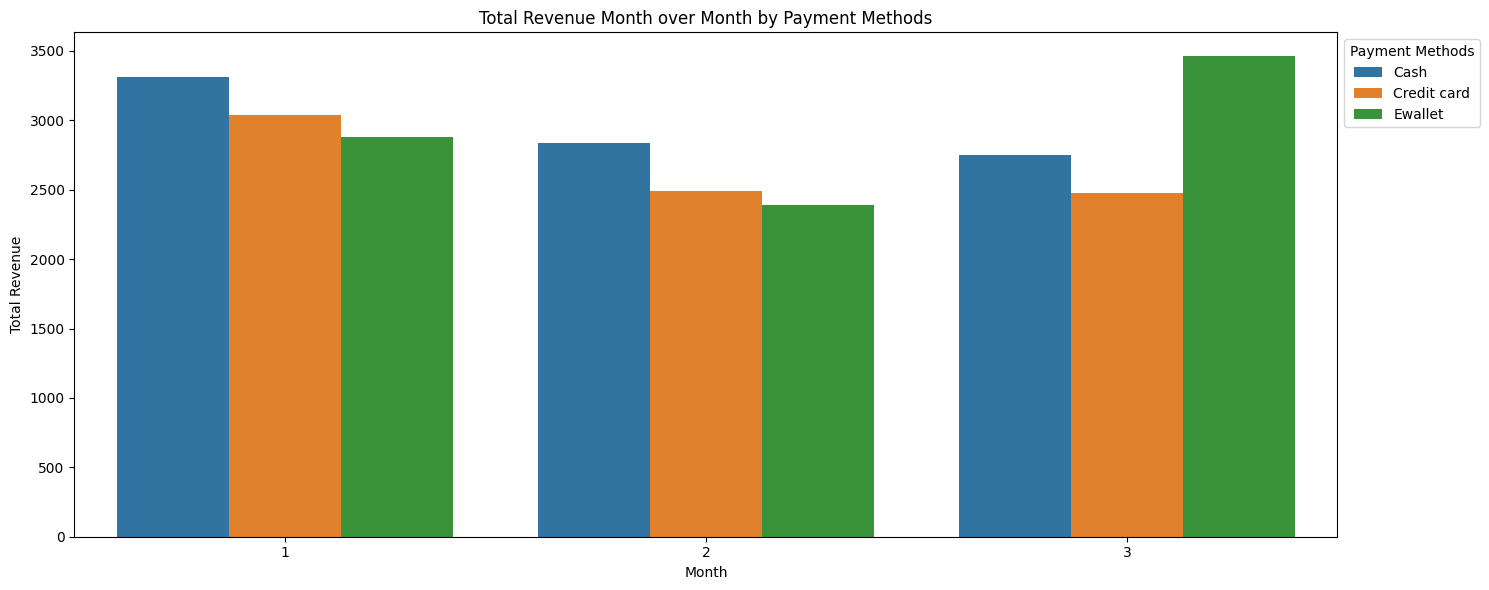

In [ ]:
# Bar Plot for Total Revenue Across Payment Methods

plt.figure(figsize = (15, 6))
sns.barplot(data = monthly_performance, x = 'Month', y = 'Total_Revenue', hue = 'Payment', errorbar = None)
plt.title('Total Revenue Month over Month by Payment Methods')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.legend(title='Payment Methods', bbox_to_anchor=(1.0, 1), loc='upper left')

plt.tight_layout()
plt.show()

## Insights for April:

    - focus more on Food Beverages, Fashion Accessories, and Health and Lifestyle.
    - Revenue and Sales are high through E-wallet. Offers on cards, cash can be focused to improve sales for the april month.
    - 